### Image Compression -

In [65]:
import numpy as np

def my_svd(A):
    # A^T A (symmetric)
    A_T_A = A.T @ A
    eigenvalues, V = np.linalg.eigh(A_T_A)

    # singular values
    sigma_vals = np.sqrt(np.maximum(eigenvalues, 0))

    # sort descending
    idx = np.argsort(sigma_vals)[::-1]
    sigma_vals = sigma_vals[idx]
    V = V[:, idx]

    # compute U from AV/σ
    U = np.zeros((A.shape[0], len(sigma_vals)))
    for i in range(len(sigma_vals)):
        if sigma_vals[i] > 1e-10:
            U[:, i] = (A @ V[:, i]) / sigma_vals[i]

    # build Sigma
    Sigma = np.zeros(A.shape)
    for i in range(min(A.shape)):
        Sigma[i, i] = sigma_vals[i]

    return U, Sigma, V.T




### Creating some dummy data

In [62]:
A = np.array(
    [[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
], dtype=float)

print("Original Matrix A:")
print(A)

Original Matrix A:
[[0. 1. 1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


Text(0.5, 1.0, 'Original (Rank 5)')

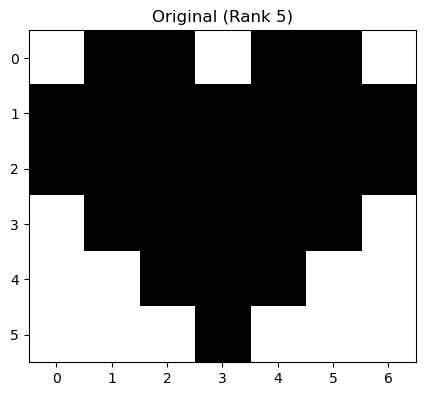

In [63]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(5, 5))

# Original
axes.imshow(A, cmap='gray_r')
axes.set_title("Original (Rank 5)")

<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_36729/2410120569.py:9: SyntaxWarning: invalid escape sequence '\S'
  axes[1].set_title("Matrix $\Sigma$\n(Singular Values)")


Text(0.5, 1.0, 'Matrix $V^T$\n(Right Singular Vectors)')

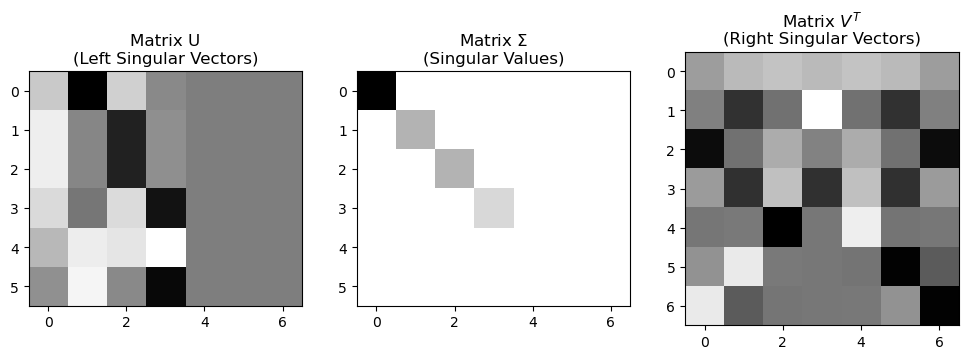

In [67]:
U,sigma,VT = my_svd(A)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(U, cmap='gray_r')
axes[0].set_title("Matrix U\n(Left Singular Vectors)")

axes[1].imshow(sigma, cmap='gray_r')
axes[1].set_title("Matrix $\Sigma$\n(Singular Values)")

axes[2].imshow(VT, cmap='gray_r')
axes[2].set_title("Matrix $V^T$\n(Right Singular Vectors)")

In [68]:
print(U,"\nSigma\n",sigma,"\nVT\n",VT)

[[-3.61249460e-01  6.14005859e-01 -3.95386062e-01 -5.32180543e-02
  -1.05674908e-08  0.00000000e+00  0.00000000e+00]
 [-5.41874189e-01 -3.88367429e-02  4.45524082e-01 -7.98270815e-02
  -5.85806557e-09  0.00000000e+00  0.00000000e+00]
 [-5.41874189e-01 -3.88367429e-02  4.45524082e-01 -7.98270815e-02
  -5.85806557e-09  0.00000000e+00  0.00000000e+00]
 [-4.45394592e-01  3.88367429e-02 -4.45524082e-01  5.17967494e-01
  -1.79187888e-08  0.00000000e+00  0.00000000e+00]
 [-2.77104327e-01 -5.36332373e-01 -4.95662101e-01 -6.24403602e-01
  -1.47025959e-08  0.00000000e+00  0.00000000e+00]
 [-8.41451321e-02 -5.75169116e-01 -5.01380194e-02  5.71185548e-01
  -1.04526268e-08  0.00000000e+00  0.00000000e+00]] 
Sigma
 [[4.73981604e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.41421356e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.41421356e+00 0.00000000e+00
  0.000

### Reconstructing the image

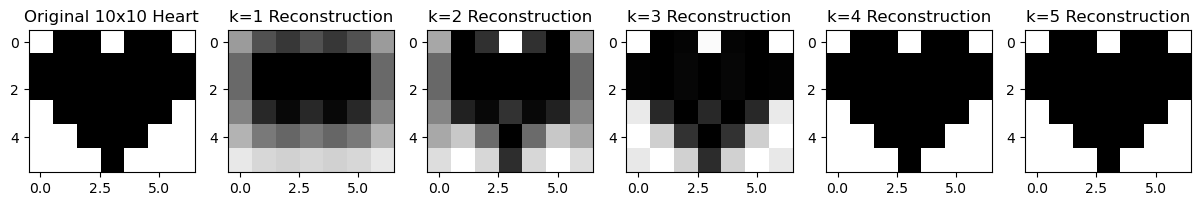

In [ ]:


fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Original 'Heart'
axes[0].imshow(A, cmap='gray_r')
axes[0].set_title("Original 10x10 Heart")

# k=1 Reconstruction
# k1 = 1
# A_k1 = U[:, :k1] @ sigma[:k1, :k1] @ VT[:k1, :] 
# axes[1].imshow(A_k1, cmap='gray_r')
# axes[1].set_title(f"k={k1} Reconstruction")

# k2 = 2
# A_k2 = U[:, :k2] @ sigma[:k2, :k2] @ VT[:k2, :]
# axes[2].imshow(A_k2, cmap='gray_r')
# axes[2].set_title(f"k={k2} Reconstruction")

for k in range (1,6):
    A_k = U[:, :k] @ sigma[:k, :k] @ VT[:k, :]
    axes[k].imshow(A_k, cmap='gray_r', vmin=0, vmax=1)
    axes[k].set_title(f"k={k} Reconstruction")

# print(A_k1)